# Airline Tweet Sentiment Analysis
This project analyzes customer sentiment from airline tweets to understand customer satisfaction levels.

## What does this project do?
- Reads tweets about airlines
- Processes the text to understand the sentiment (positive, negative, or neutral)
- Creates a model that can automatically detect if a tweet is positive, negative, or neutral

## Step 1: Setting Up Required Tools
The following code installs NLTK (Natural Language Toolkit), which helps us process and understand human language.


In [24]:
!pip install nltk

## Step 2: Loading Essential Software
These are the building blocks we need to analyze text and create our prediction model.


### Importing Libraries

In [25]:
import numpy as np 
import pandas as pd 
import re #Regular expressions
import nltk 
import matplotlib.pyplot as plt 

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

## Step 3: Loading the Tweet Data
We're using a dataset of airline tweets. Each tweet has been labeled as positive, negative, or neutral.


### Importing Dataset

In [26]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

## Segregating Dataset into Input & Output

In [27]:
features = dataset.iloc[:, 10].values
labels = dataset.iloc[:, 1].values
print(labels)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


## Step 4: Cleaning the Text
Before we can analyze the tweets, we need to clean them by:
- Removing special characters and punctuation
- Converting all text to lowercase
- Removing extra spaces
- Making the text consistent and computer-friendly


In [28]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


## Step 5: Converting Text to Numbers
Feature Extraction from text: Computers can't understand text directly, so we convert the tweets into numbers while keeping their meaning intact.


In [29]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krutarth_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 6: Preparing Training Data
We split our data into two parts:
- Training data (80%): Used to teach our model
- Testing data (20%): Used to check how well our model performs


In [30]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Step 7: Training the Model
We use a Random Forest algorithm, which is like having many decision-makers working together to determine if a tweet is positive, negative, or neutral.


In [31]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

## Step 8: Testing the Model's Accuracy
We check how well our model performs by comparing its predictions with the actual sentiments.
### Predicting the Test data with Trained Model

In [34]:
predictions = text_classifier.predict(X_test)

### Score of the Model

In [35]:
print(accuracy_score(y_test, predictions))

0.7592213114754098



## Step 9: Visualizing Results using confusion matrix
The following visualization shows how well our model classified the tweets:
- Dark blue boxes show correct predictions
- Numbers show how many tweets were classified in each category


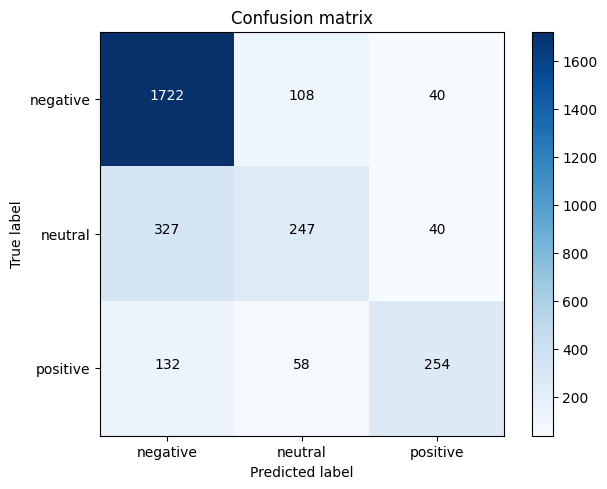

In [36]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, predictions, labels=['negative', 'neutral', 'positive'])
plot_confusion_matrix(cm, classes=['negative', 'neutral', 'positive'])